In [1]:
from os import listdir
from os.path import isfile, join
import datetime

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt


%matplotlib inline

### Data - Restaurant Week 2018  (https://www.kaggle.com/popoandrew/restaurant-week-2018)

In [188]:
rstw_2018 = pd.read_csv('data/rstw_2018.csv')

# remove 57, 338 since they are not in yelp database
rstw_2018.drop(57, inplace=True)
rstw_2018.drop(338, inplace=True)
rstw_2018 = rstw_2018.reset_index(drop=True)
rstw_2018['postal_code'] = rstw_2018['postal_code'].fillna(0)

display(rstw_2018)

,name,street_address,google_map,review_count,phone,website,restaurant_type,average_review,food_review,service_review,...,star_1,star_2,star_3,star_4,star_5,description,restaurant_main_type,latitude,longitude,postal_code
0,Smoke Jazz and Supper Club,"2751 Broadway New York, NY 10025",//www.google.com/maps/search/?api=1&query=40.8...,2155,(212) 864-6662,http://www.smokejazz.com/,Contemporary American,4.421550,3.9,4.2,...,2,7,5,24,62,Smoke has augmented its reputation as one of M...,Contemporary American,40.801126,-73.968192,10025.0
1,Tavern on the Green,"1 Tavern on the Green New York, NY 10023",//www.google.com/maps/search/?api=1&query=40.7...,7029,(212) 877-8684,http://www.tavernonthegreen.com/,American,4.670290,4.4,4.4,...,1,2,6,19,72,Magical is a word thrown around a lot when dis...,American,40.772187,-73.977722,10023.0
2,ABC Kitchen,"35 East 18th Street New York, NY 10003",//www.google.com/maps/search/?api=1&query=40.7...,6031,(212) 475-5829,http://www.abckitchennyc.com/,Contemporary American,4.760310,4.6,4.4,...,1,2,5,15,77,ABC Kitchen with Jean-Georges: passionately co...,Contemporary American,40.737897,-73.989499,10003.0
3,Catch New York,"21 Ninth Avenue New York, NY 10014",//www.google.com/maps/search/?api=1&query=40.7...,4830,(212) 392-5978,http://www.catchhg.com/,Seafood,4.548300,4.6,4.2,...,3,2,6,15,74,CATCH features contemporary renditions of clas...,Seafood,40.740227,-74.006340,10014.0
4,Becco,"355 West 46th Street New York, NY 10010",//www.google.com/maps/search/?api=1&query=40.7...,18139,(212) 397-7597,http://www.becco-nyc.com/,Italian,4.418139,4.4,4.4,...,1,3,9,27,60,Lidia Bastianich & her son Joe's Theater Distr...,Italian,40.760804,-73.989832,10010.0
5,Estiatorio Milos - NY,"125 West 55th Street New York, NY 10019",//www.google.com/maps/search/?api=1&query=40.7...,4404,(212) 245-7400,http://www.estiatoriomilos.com/,Seafood,4.844040,4.8,4.6,...,1,1,3,14,81,"The freshest, most flavorful fish, vegetables ...",Seafood,40.763598,-73.978951,10019.0
6,Tao Uptown,"42 East 58th Street New York, NY 10022",//www.google.com/maps/search/?api=1&query=40.7...,10600,(212) 888-2288,http://www.taorestaurant.com/,Asian,4.610600,4.5,4.4,...,1,2,7,21,69,"A 16-foot Buddha, which floats above a reflect...",Asian,40.762607,-73.971478,10022.0
7,Red Rooster Harlem,"310 Lenox Avenue New York, NY 10027",//www.google.com/maps/search/?api=1&query=40.8...,5682,(212) 792-9001,http://redroosterharlem.com/,Southern,4.456820,4.4,4.2,...,2,3,10,24,61,"Located in the heart of Harlem, Red Rooster se...",Other,40.808057,-73.944914,10027.0
8,Del Frisco's Double Eagle Steak House - New Yo...,"1221 Avenue of the Americas New York, NY 10020",//www.google.com/maps/search/?api=1&query=40.7...,7225,(212) 575-5129,http://delfriscos.com/,Steakhouse,4.772250,4.6,4.7,...,1,2,5,16,76,A midtown classic with sprawling views of the ...,Steakhouse,40.759425,-73.982222,10020.0
9,FIG & OLIVE Fifth Avenue,"10 East 52nd Street New York, NY 10021",//www.google.com/maps/search/?api=1&query=40.7...,7186,(212) 319-2002,http://www.figandolive.com/,Mediterranean,4.571860,4.5,4.3,...,1,3,7,25,64,FIG & OLIVE is about passion for the best oliv...,Mediterranean,40.759280,-73.975634,10021.0


In [3]:
rstw_2018.columns

Index(['name', 'street_address', 'google_map', 'review_count', 'phone',
       'website', 'restaurant_type', 'average_review', 'food_review',
       'service_review', 'ambience_review', 'value_review', 'price_range',
       'star_1', 'star_2', 'star_3', 'star_4', 'star_5', 'description',
       'restaurant_main_type', 'latitude', 'longitude', 'postal_code'],
      dtype='object')

### Yelp Data - download from Yelp API

In [13]:
yelp_rsts = pd.read_csv("data/yelp_rst_2019.csv")
yelp_rsts.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,smoke-jazz-and-supper-club-new-york-2,"[{'alias': 'jazzandblues', 'title': 'Jazz & Bl...","{'latitude': 40.8012384, 'longitude': -73.9681...",(212) 864-6662,5.912356,trbr9pYDDmXCj9z8m2d6LQ,https://s3-media2.fl.yelpcdn.com/bphoto/mtoknH...,False,"{'address1': '2751 Broadway', 'address2': None...",Smoke Jazz & Supper Club,1.212865e+10,$$,4.0,352,"['pickup', 'delivery']",https://www.yelp.com/biz/smoke-jazz-and-supper...
1,tavern-on-the-green-new-york-7,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.772194, 'longitude': -73.9776}",(212) 877-8684,20.401585,hKdvsbuQRtjajWYwjaoOQw,https://s3-media1.fl.yelpcdn.com/bphoto/fBgjO7...,False,"{'address1': '67 Central Park W', 'address2': ...",Tavern on the Green,1.212878e+10,$$$,3.5,1240,[],https://www.yelp.com/biz/tavern-on-the-green-n...
2,abc-kitchen-new-york,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.738085, 'longitude': -73.989472}",(212) 475-5829,39.424873,dMhRafXdr765DHe0k-QfaQ,https://s3-media2.fl.yelpcdn.com/bphoto/k2V0Qy...,False,"{'address1': '35 E 18th St', 'address2': '', '...",ABC Kitchen,1.212476e+10,$$$,4.0,2866,[],https://www.yelp.com/biz/abc-kitchen-new-york?...
3,catch-new-york-new-york,"[{'alias': 'advertising', 'title': 'Advertisin...","{'latitude': 40.74681, 'longitude': -73.98442}",(212) 715-8700,1994.761480,7mB_COyhOY1k01JcOu-wTw,https://s3-media4.fl.yelpcdn.com/bphoto/q1THJC...,False,"{'address1': '15 E 32nd St', 'address2': '4th ...",Catch -New York,1.212716e+10,NaN,3.5,37,[],https://www.yelp.com/biz/catch-new-york-new-yo...
4,becco-new-york-4,"[{'alias': 'italian', 'title': 'Italian'}]","{'latitude': 40.76083, 'longitude': -73.98981}",(212) 397-7597,3.072498,QObHX0yR6zd0WfksRDbJTA,https://s3-media3.fl.yelpcdn.com/bphoto/w5_bcc...,False,"{'address1': '355 W 46th St', 'address2': '', ...",Becco,1.212398e+10,$$$,3.5,2680,[],https://www.yelp.com/biz/becco-new-york-4?adju...


### Restaurant Reviews  - Scrape from Yelp website

In [181]:
Bronx = set([10453, 10457, 10460, 10458, 10467, 10468, 
             10451, 10452, 10456, 10454, 10455, 10459, 
             10474, 10463, 10471, 10466, 10469, 10470, 
             10475, 10461, 10462,10464, 10465, 10472, 
             10473])


Brooklyn = set([11212, 11213, 11216, 11233, 11238, 11209,
                11214, 11228, 11204, 11218, 11219, 11230, 
                11234, 11236, 11239, 11223, 11224, 11229, 
                11235, 11201, 11205, 11215, 11217, 11231, 
                11203, 11210, 11225, 11226, 11207, 11208,
                11211, 11222, 11220, 11232, 11206, 11221, 11237])

# Manhattan
Harlem = set([10026, 10027, 10030, 10037, 10039, 10029, 10035])
ChelseaandClinton = set([10001, 10011, 10018, 10019, 10020, 10036])
GramercyParkandMurrayHill = set([10010, 10016, 10017, 10022])
GreenwichVillageandSoho = set([10012, 10013, 10014])
LowerManhattan = set([10004, 10005, 10006, 10007, 10038, 10280])
LowerEastSide = set([10002, 10003, 10009])
UpperEastSide = set([10021, 10028, 10044, 10065, 10075, 10128])
UpperWestSide = set([10023, 10024, 10025])
InwoodandWashingtonHeights = set([10031, 10032, 10033, 10034, 10040])

Queens = set([11361, 11362, 11363, 11364, 11354, 11355, 11356, 11357, 
           11358, 11359, 11360, 11365, 11366, 11367, 11412, 11423, 
           11432, 11433, 11434, 11435, 11436, 11101, 11102, 11103, 
           11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 
           11692, 11693, 11694, 11695, 11697, 11004, 11005, 11411, 
           11413, 11422, 11426, 11427, 11428, 11429, 11414, 11415, 
           11416, 11417, 11418, 11419, 11420, 11421, 11368, 11369, 
           11370, 11372, 11373, 11377, 11378])

StatenIsland = set([10302, 10303, 10310, 10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305, 10314])


def getLocationFromZip(zipcode):
    if zipcode in Bronx:
        return "Bronx"
    if zipcode in Brooklyn:
        return "Brooklyn"
    if zipcode in Harlem:
        return "Harlem"
    if zipcode in ChelseaandClinton:
        return "Chelsea and Clinton"
    if zipcode in GramercyParkandMurrayHill:
        return "Gramercy Park and Murray Hill"
    if zipcode in GreenwichVillageandSoho:
        return "Greenwich Village and Soho"
    if zipcode in LowerManhattan:
        return "Lower Manhattan"
    if zipcode in LowerEastSide:
        return "Lower East Side"
    if zipcode in UpperEastSide:
        return "Upper East Side"
    if zipcode in UpperWestSide:
        return "Upper West Side"
    if zipcode in InwoodandWashingtonHeights:
        return "Inwood and Washington Heights"
    if zipcode in Queens:
        return "Queens"
    if zipcode in StatenIsland:
        return 'Staten Island'
    
    return "Other"

In [189]:
def parseReviews():
    dir_path = "data/reviews"
    review_files = [f for f in listdir(dir_path) if f.endswith('.csv') and isfile(join(dir_path, f))]
    review_files.sort()

    rst_week_start = datetime.date(2018, 7, 23)
    rst_week_end = datetime.date(2018, 8, 17)

    results = pd.DataFrame(data=[], columns=['alias', 'cur_rating', 'review_count', 'avg_rating', 'rating_1s', 'rating_2s', 'rating_3s', 'rating_4s', 'rating_5s', 
                                             'rw_review_count', 'rw_avg_rating', 'rw_rating_1s', 'rw_rating_2s', 'rw_rating_3s', 'rw_rating_4s', 'rw_rating_5s',
                                            'price_range', 'restaurant_main_type', 'district']) 
    for f in review_files:
        print(f)
        idx = int(f.split('_')[0])
        reviews = pd.read_csv(join(dir_path, f))
        reviews['time_created'] = pd.to_datetime(reviews['time_created'])

        row = []
        row.append(yelp_rsts.loc[idx]['alias'])
        row.append(yelp_rsts.loc[idx]['rating'])
        row.append(reviews.shape[0])
        row.append(round(reviews['rating'].mean(), 2))
        for i in range(1, 6):
            row.append(reviews[reviews['rating'] == i].shape[0])

        rw_reviews = reviews[(rst_week_start <= reviews['time_created']) & (reviews['time_created'] <= rst_week_end)]
        row.append(rw_reviews['rating'].shape[0])
        row.append(round(rw_reviews['rating'].mean(), 2))
        for i in range(1, 6):
            row.append(rw_reviews[rw_reviews['rating'] == i].shape[0])
        row.append(rstw_2018.loc[idx]['price_range'])
        row.append(rstw_2018.loc[idx]['restaurant_main_type'])
        row.append(getLocationFromZip(int(rstw_2018.loc[idx]['postal_code'])))
                   
        results.loc[idx] = pd.Series(row, index=results.columns)

    display(results)
    results.to_csv("data/review_analysis.csv")

In [190]:
parseReviews()

000_smoke_jazz_and_supper_club_new_york_2.csv
001_tavern_on_the_green_new_york_7.csv


/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.


002_abc_kitchen_new_york.csv
003_catch_new_york_new_york.csv
004_becco_new_york_4.csv
005_estiatorio_milos_new_york.csv
006_tao_uptown_new_york.csv
007_red_rooster_harlem_new_york_3.csv
008_del_friscos_double_eagle_steakhouse_new_york.csv
009_fig_and_olive_fifth_ave_new_york_4.csv
010_rosa_mexicano_new_york_6.csv
011_abc_cocina_new_york.csv
012_gallaghers_steakhouse_new_york.csv
013_boulud_sud_new_york.csv
014_nougatine_at_jean_georges_new_york_3.csv
015_sarabeths_new_york_10.csv
016_tao_downtown_new_york_2.csv
017_ilili_new_york_2.csv
018_scarpetta_new_york.csv
019_atlantic_grill_new_york_3.csv
020_empellón_new_york_3.csv
021_ocean_prime_new_york.csv
022_sarabeths_west_new_york.csv
024_toloache_50_new_york.csv
025_blue_fin_new_york.csv
026_bar_boulud_new_york_2.csv
027_hakkasan_new_york.csv
028_lincoln_ristorante_new_york.csv
029_cafe_boulud_new_york_4.csv
030_the_view_restaurant_and_lounge_new_york.csv
031_park_avenue_autumn_winter_spring_summer_new_york_3.csv
032_zuma_new_york_2.csv

245_the_gin_parlour_new_york.csv
246_michael_jordans_the_steak_house_nyc_new_york_2.csv
247_beauty_and_essex_new_york.csv
248_the_mercer_kitchen_new_york_6.csv
249_the_dutch_new_york.csv
250_lafayette_new_york_2.csv
251_vandal_new_york.csv
252_gotham_bar_and_grill_new_york.csv
253_il_buco_alimentari_and_vineria_new_york_2.csv
254_bar_primi_new_york_3.csv
255_lure_fishbar_new_york_2.csv
256_nix_new_york.csv
257_lupa_new_york.csv
258_claudette_new_york.csv
259_empellón_taqueria_new_york.csv
260_perry_st_new_york.csv
261_boucherie_west_village_new_york_3.csv
262_indochine_new_york.csv
263_el_vez_new_york.csv
264_public_kitchen_new_york_2.csv
265_tamarind_new_york_4.csv
266_the_stanton_social_new_york.csv
267_hearth_new_york.csv
268_sarabeths_tribeca_new_york.csv
269_leuca_brooklyn.csv
270_sant_ambroeus_new_york_4.csv
271_il_cantinori_new_york.csv
272_mr_chow_new_york.csv
273_narcissa_new_york.csv
274_il_mulino_new_york_downtown_new_york_2.csv
275_sant_ambroeus_new_york.csv
276_pig_and_kha

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,district
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0,$31 to $50,Contemporary American,Upper West Side
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13,$31 to $50,American,Upper West Side
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11,$31 to $50,Contemporary American,Lower East Side
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood,Greenwich Village and Soho
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9,$30 and under,Italian,Gramercy Park and Murray Hill
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7,$50 and over,Seafood,Chelsea and Clinton
6,tao-uptown-new-york,3.5,2449,3.55,219,267,521,822,620,12,3.67,2,0,2,4,4,$31 to $50,Asian,Gramercy Park and Murray Hill
7,red-rooster-harlem-new-york-3,3.5,2939,3.53,273,420,573,828,845,36,3.78,3,6,4,6,17,$31 to $50,Other,Harlem
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29,$50 and over,Steakhouse,Chelsea and Clinton
9,fig-and-olive-fifth-ave-new-york-4,3.5,1098,3.57,89,124,203,432,250,13,3.77,0,2,4,2,5,$31 to $50,Mediterranean,Upper East Side


In [193]:
analysis = pd.read_csv("data/review_analysis.csv", index_col=0)
analysis['diff'] = analysis['rw_avg_rating'] - analysis['avg_rating']
analysis.head()

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,district,diff
0,smoke-jazz-and-supper-club-new-york-2,4.0,350,3.78,30,32,44,122,122,5,2.20,1,2,2,0,0,$31 to $50,Contemporary American,Upper West Side,-1.58
1,tavern-on-the-green-new-york-7,3.5,1238,3.38,208,163,192,304,371,29,3.86,1,5,4,6,13,$31 to $50,American,Upper West Side,0.48
2,abc-kitchen-new-york,4.0,2855,4.09,101,169,359,969,1257,20,3.80,3,2,2,2,11,$31 to $50,Contemporary American,Lower East Side,-0.29
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood,Greenwich Village and Soho,-2.44
4,becco-new-york-4,3.5,2674,3.73,211,261,462,857,883,16,4.12,0,3,1,3,9,$30 and under,Italian,Gramercy Park and Murray Hill,0.39


### Profiling Restaurant Week 2018 Summer

In [192]:
def getRatios(dataframe, column):
    items = dataframe[column].unique()
    labels = []
    ratios = []
    counts = []
    for item in items:
        labels.append(item.replace('$', '\$'))
        counts.append(dataframe[dataframe[column] == item].shape[0])
        ratios.append(counts[-1] / dataframe.shape[0])

    return labels, ratios, counts

<>:7: DeprecationWarning: invalid escape sequence \$
<>:7: DeprecationWarning: invalid escape sequence \$
<>:7: DeprecationWarning: invalid escape sequence \$
<ipython-input-192-bb1791747f01>:7: DeprecationWarning: invalid escape sequence \$
  labels.append(item.replace('$', '\$'))


#### price

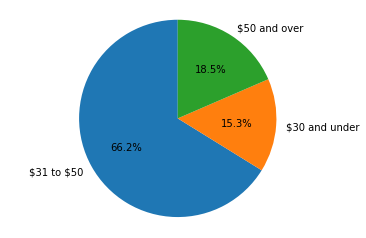

In [8]:
labels, ratios, counts = getRatios(rstw_2018, 'price_range')
fig, ax = plt.subplots()
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [85]:
rst_type = pd.read_csv("data/rst_type.csv")
rst_type.head()

,Unnamed: 0,overall,excellent,better,worse,other
0,$30 and under,53,2,20,12,19
1,$31 to $50,228,14,67,65,82
2,$50 and over,64,8,19,18,19


#### Category

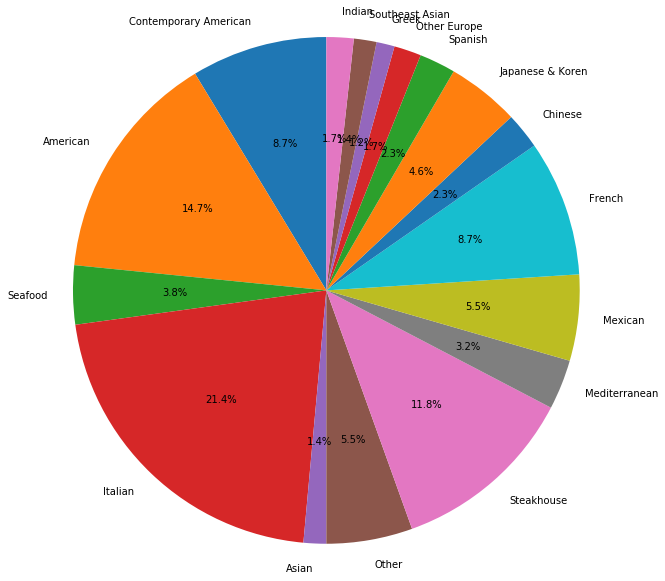

In [8]:
labels, ratios, counts = getRatios(rstw_2018, 'restaurant_main_type')
fig, ax = plt.subplots(figsize=[10, 10])
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Location

['Upper West Side', 'Lower East Side', 'Greenwich Village and Soho', 'Gramercy Park and Murray Hill', 'Chelsea and Clinton', 'Harlem', 'Upper East Side', 'Other', 'Inwood and Washington Heights', 'Queens', 'Lower Manhattan', 'Brooklyn', 'Staten Island']
[0.057971014492753624, 0.11304347826086956, 0.14492753623188406, 0.22318840579710145, 0.2956521739130435, 0.008695652173913044, 0.05217391304347826, 0.043478260869565216, 0.002898550724637681, 0.002898550724637681, 0.03768115942028986, 0.014492753623188406, 0.002898550724637681]
[20, 39, 50, 77, 102, 3, 18, 15, 1, 1, 13, 5, 1]


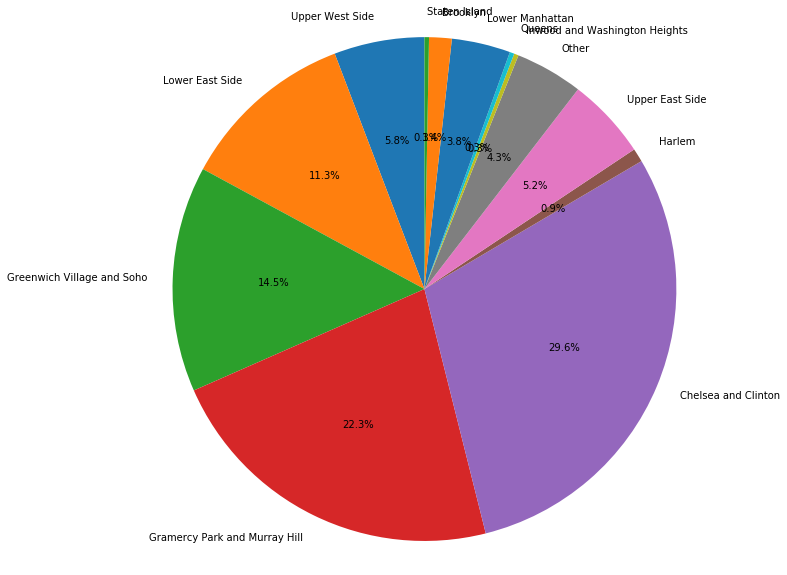

In [194]:
labels, ratios, counts = getRatios(analysis, 'district')
print(labels)
print(ratios)
print(counts)
fig, ax = plt.subplots(figsize=[10, 10])
ax.pie(ratios, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Average Rating: Overall vs Restaurant Week

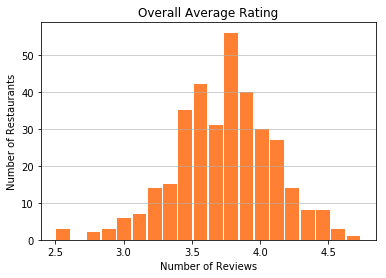

In [109]:
plt.hist(analysis['avg_rating'],bins=20, rwidth=0.9, color='#FF8033')
plt.title('Overall Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=0.75)

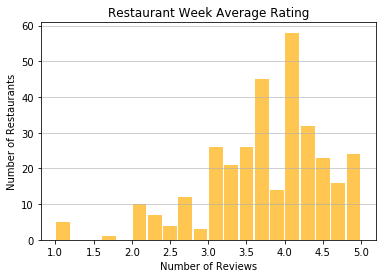

In [27]:
plt.hist(analysis['rw_avg_rating'],bins=20, rwidth=0.9, color='#FFC652')
plt.title('Restaurant Week Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=0.75)

In [177]:
analysis['rw_avg_rating'].mean()

3.743119266055048

#### Review Count

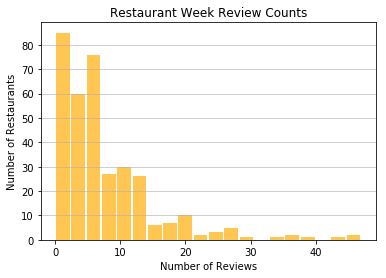

In [28]:
plt.hist(analysis['rw_review_count'],bins=20, rwidth=0.9, color='#FFC652')
plt.title('Restaurant Week Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=0.75)

In [178]:
analysis['rw_review_count'].mean()

7.573913043478261

In [179]:
no0reviews = analysis[analysis['rw_review_count'] != 0]
no0reviews['rw_review_count'].mean()

7.990825688073395

#### No review on rst week

In [15]:
no_reviews = analysis[analysis['rw_review_count'] == 0]
print(no_reviews.shape[0])
no_reviews.head()

18


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
141,etcetera-etcetera-new-york,4.0,406,3.97,17,30,63,136,160,0,NaN,0,0,0,0,0,$31 to $50,Italian,NaN
142,cafe-centro-new-york-8,3.5,149,3.47,7,24,40,48,30,0,NaN,0,0,0,0,0,$31 to $50,French,NaN
165,cipriani-new-york-2,3.5,99,3.56,15,8,14,31,31,0,NaN,0,0,0,0,0,$31 to $50,Italian,NaN
174,delmonicos-kitchen-new-york-3,3.5,321,3.49,33,49,63,81,95,0,NaN,0,0,0,0,0,$31 to $50,American,NaN
184,tarallucci-e-vino-upper-west-side-new-york,3.5,111,3.67,10,9,25,31,36,0,NaN,0,0,0,0,0,$31 to $50,Italian,NaN


#### We put restaurant into four categories. The first is the excellent restaurants with an overall rating above 4.25

In [22]:
excellent = analysis['avg_rating'] >= 4.25
e_rst = analysis[excellent].sort_values(['avg_rating'], ascending=False)
# print(e_rst.shape[0])
# e_rst.head()
# e_rst.groupby(['restaurant_main_type']).count()
e_idx = e_rst.index
e_idx

Int64Index([ 67, 153, 298, 133, 129, 241, 307, 331, 302, 111, 261,  21,  96,
            107, 213, 106, 325, 177, 252, 285, 312,   8, 306, 281],
           dtype='int64')

#### The second is the restaurants that are doing better in the restaurants weeks

In [23]:
b_rst = analysis[(excellent == False) & (analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] >= 0.25)]
# print(b_rst.shape[0])
# b_rst.head()
# b_rst.groupby(['restaurant_main_type']).count()
b_idx = b_rst.index
b_idx

Int64Index([  1,   4,   5,   7,  10,  13,  19,  25,  27,  28,
            ...
            314, 315, 317, 319, 328, 329, 330, 333, 334, 342],
           dtype='int64', length=106)

#### The third with restaurants doing worse

In [25]:
w_rst = analysis[(excellent == False) & (analysis['rw_review_count'] != 0) & (analysis['avg_rating'] - analysis['rw_avg_rating'] >= 0.25)]
# print(w_rst.shape[0])
# w_rst.head()
# w_rst.groupby(['restaurant_main_type']).count()
w_idx = w_rst.index
w_idx

Int64Index([  0,   2,   3,  12,  14,  16,  35,  37,  40,  41,  46,  48,  51,
             58,  60,  61,  62,  64,  65,  68,  79,  85,  86,  87,  88,  89,
             91,  93,  94,  95, 100, 104, 116, 120, 124, 125, 131, 134, 135,
            138, 145, 148, 151, 152, 156, 157, 158, 166, 167, 171, 173, 179,
            189, 193, 194, 195, 204, 206, 211, 214, 216, 217, 222, 225, 230,
            238, 245, 250, 253, 256, 258, 259, 260, 267, 270, 272, 274, 275,
            277, 278, 282, 283, 290, 291, 299, 300, 301, 305, 308, 322, 326,
            336, 337, 339, 340],
           dtype='int64')

### Recommendations


#### Restaurants Worth Trying (with most increase in rating)

In [76]:
analysis[analysis['rw_review_count'] > 5].sort_values(['diff'], ascending=False)

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
196,inakaya-new-york,3.5,511,3.66,46,48,94,170,153,6,4.67,0,0,0,2,4,$31 to $50,Japanese & Koren,1.01
263,el-vez-new-york,3.5,583,3.58,41,71,119,211,141,7,4.57,0,0,0,3,4,$30 and under,Mexican,0.99
248,the-mercer-kitchen-new-york-6,3.5,1505,3.31,170,212,370,492,261,7,4.29,0,0,2,1,4,$30 and under,American,0.98
319,il-cortile-restaurant-new-york,3.5,456,3.71,49,48,59,131,169,6,4.67,0,0,1,0,5,$31 to $50,Italian,0.96
286,delmonicos-new-york,4.0,968,3.80,53,100,169,315,331,11,4.73,0,0,0,3,8,$50 and over,Steakhouse,0.93
329,thalassa-restaurant-new-york,4.0,379,4.08,26,27,33,97,196,7,5.00,0,0,0,0,7,$31 to $50,Seafood,0.92
255,lure-fishbar-new-york-2,4.0,1554,3.86,73,120,256,613,492,11,4.73,0,0,1,1,9,$31 to $50,Seafood,0.87
130,david-burke-tavern-new-york,4.0,150,3.84,20,14,13,26,77,7,4.57,0,0,0,3,4,$31 to $50,American,0.73
175,mortons-the-steakhouse-new-york-2,4.0,476,3.89,28,45,64,151,188,8,4.62,0,0,1,1,6,$50 and over,Steakhouse,0.73
333,mortons-the-steakhouse-new-york-2,4.0,476,3.89,28,45,64,151,188,8,4.62,0,0,1,1,6,$50 and over,Steakhouse,0.73


#### Best Rating Restaurants

In [17]:
better = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] >= 0.05)]
even_better = better[(better['rw_avg_rating'] >= 4) & (better['rw_review_count'] >= 10)].sort_values(['rw_avg_rating', 'avg_rating'], ascending=False)
print(even_better.shape)
even_better.head(6)

(25, 19)


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
255,lure-fishbar-new-york-2,4.0,1554,3.86,73,120,256,613,492,11,4.73,0,0,1,1,9,$31 to $50,Seafood,0.87
286,delmonicos-new-york,4.0,968,3.80,53,100,169,315,331,11,4.73,0,0,0,3,8,$50 and over,Steakhouse,0.93
96,the-seafire-grill-new-york-4,4.5,1058,4.40,25,44,82,236,671,21,4.57,1,0,1,3,16,$31 to $50,Seafood,0.17
5,estiatorio-milos-new-york,4.0,827,3.99,42,62,106,271,346,12,4.42,0,0,2,3,7,$50 and over,Seafood,0.43
8,del-friscos-double-eagle-steakhouse-new-york,4.5,2751,4.29,89,127,276,657,1602,44,4.41,1,1,6,7,29,$50 and over,Steakhouse,0.12
295,temple-court-new-york,3.5,179,3.66,21,21,27,38,72,13,4.31,0,1,3,0,9,$31 to $50,American,0.65


#### Restaurant Week Blacklist (with most decrease in rating)

In [75]:
analysis[analysis['rw_review_count'] > 5].sort_values(['diff'], ascending=True)

,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
173,le-colonial-new-york,3.5,260,3.35,29,34,65,82,50,9,1.67,6,1,1,1,0,$31 to $50,Southeast Asian,-1.68
157,barraca-new-york,3.5,644,3.68,62,75,88,199,220,8,2.12,3,3,1,0,1,$31 to $50,Spanish,-1.56
278,neta-new-york,4.0,358,3.85,25,35,55,95,148,10,2.60,3,2,2,2,1,$50 and over,Japanese & Koren,-1.25
206,perrine-new-york-2,4.0,56,3.88,4,4,11,13,24,6,2.67,1,2,2,0,1,$31 to $50,French,-1.21
151,american-cut-steakhouse-tribeca-new-york,4.0,536,3.88,40,43,78,156,219,10,3.00,2,2,1,4,1,$31 to $50,Steakhouse,-0.88
290,american-cut-steakhouse-tribeca-new-york,4.0,536,3.88,40,43,78,156,219,10,3.00,2,2,1,4,1,$31 to $50,Steakhouse,-0.88
37,lavo-new-york-4,3.5,965,3.25,197,96,168,274,230,8,2.38,3,1,3,0,1,$50 and over,Italian,-0.87
260,perry-st-new-york,4.0,908,3.96,32,74,140,314,348,7,3.29,1,1,1,3,1,$31 to $50,Contemporary American,-0.67
267,hearth-new-york,4.0,683,3.81,40,69,119,209,246,7,3.14,0,3,1,2,1,$50 and over,American,-0.67
171,high-street-on-hudson-new-york,4.0,372,3.78,30,29,61,125,127,9,3.11,1,3,0,4,1,$31 to $50,Contemporary American,-0.67


#### Worst Rating Restaurants

In [123]:
worse = analysis[(analysis['rw_review_count'] != 0) & (analysis['rw_avg_rating'] - analysis['avg_rating'] <= -0.25)]
not_worthy = worse[worse['avg_rating'] <= 3.5].sort_values(['rw_avg_rating', 'avg_rating'])
print(not_worthy.shape)
wr_idx = not_worthy.index

not_worthy.head(7)


(29, 19)


,alias,cur_rating,review_count,avg_rating,rating_1s,rating_2s,rating_3s,rating_4s,rating_5s,rw_review_count,rw_avg_rating,rw_rating_1s,rw_rating_2s,rw_rating_3s,rw_rating_4s,rw_rating_5s,price_range,restaurant_main_type,diff
225,gaby-brasserie-française-new-york,3.0,95,3.16,13,18,17,35,12,2,1.00,2,0,0,0,0,$31 to $50,French,-2.16
3,catch-new-york-new-york,3.5,36,3.44,9,2,4,6,15,1,1.00,1,0,0,0,0,$31 to $50,Seafood,-2.44
173,le-colonial-new-york,3.5,260,3.35,29,34,65,82,50,9,1.67,6,1,1,1,0,$31 to $50,Southeast Asian,-1.68
65,the-national-bar-and-dining-rooms-new-york-2,3.0,616,2.92,115,131,138,150,82,2,2.00,1,0,1,0,0,$30 and under,Contemporary American,-0.92
89,mr-chow-new-york,3.0,328,3.01,73,52,65,74,64,3,2.00,2,0,0,1,0,$50 and over,Chinese,-1.01
272,mr-chow-new-york,3.0,328,3.01,73,52,65,74,64,3,2.00,2,0,0,1,0,$50 and over,Chinese,-1.01
179,shun-lee-palace-new-york,3.0,273,3.03,56,50,47,71,49,3,2.00,1,1,1,0,0,$31 to $50,Chinese,-1.03


# Maps

In [25]:
import folium
from folium import plugins
import seaborn as sns
import matplotlib.cm as cm


In [14]:
m = folium.Map([40.75, -73.99], zoom_start=12)

# mark each station as a point
for index, row in rstw_2018.iterrows():
    folium.CircleMarker([rstw_2018['latitude'], rstw_2018['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# convert to (n, 2) nd-array format for heatmap
stationArr = rstw_2018[['latitude', 'longitude']].values

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
# m.save('rstw_heatmap.html')
m

In [133]:
main_type_list = (rstw_2018.restaurant_main_type.unique()).tolist()
# colors = cm.rainbow(np.linspace(0, 1, len(main_type_list)))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'pink', 'lightblue', 'lightgreen',
             'gray', 'lightgray']

def get_color(i):
    return colors[i % len(main_type_list)]
    return colors[main_type_list.index(rstw_2018.iloc[i]['restaurant_main_type'])]

In [134]:
m_2 = folium.Map([40.75, -73.99], zoom_start=14)

for i in range(len(rstw_2018)):
    folium.Marker([rstw_2018.iloc[i]['latitude'], rstw_2018.iloc[i]['longitude']],
                  tooltip = rstw_2018.iloc[i]['name'],
                 icon=folium.Icon(color=get_color(i))).add_to(m_2)


m_2.save('rstw_marker.html')    
m_2

# NLP

#### idx: filename

In [35]:
dir_path = "data/reviews"
review_files = [f for f in listdir(dir_path) if f.endswith('.csv') and isfile(join(dir_path, f))]

idx2Filename = {int(f.split('_')[0]):f for f in review_files}    
reviews = pd.read_csv(join(dir_path, idx2Filename[0]))
reviews['text'].head()

0    I went to the Supper club last night for Ella ...
1    Went there today! Was excellent! Cynthia Scott...
2    Don't get fooled by the token black guy behind...
3    Honestly and truly, Smoke Jazz is awesome. I'v...
4    Beautiful, great music, great ambiance. My onl...
Name: text, dtype: object

In [101]:
rst_week_start = datetime.date(2018, 7, 23)
rst_week_end = datetime.date(2018, 8, 17)

e_reviews = []
for idx in e_idx[1:]:
    reviews = pd.read_csv(join(dir_path, idx2Filename[idx]))
    reviews['time_created'] = pd.to_datetime(reviews['time_created'])
    reviews = reviews[(rst_week_start <= reviews['time_created']) & (reviews['time_created'] <= rst_week_end)]
    e_reviews.append(reviews['text'].values)
len(e_reviews)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


23

In [109]:
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['^[0-9]', ' ', 'wa'] 

 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
     emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
lemmatizer = nltk.stem.WordNetLemmatizer()


def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    wordlist=[]
    tokens = tokenize(s)
    
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
        #tokens = [lemmatizer.lemmatize(t) for t in tokens]
        for item in tokens:
            item = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",item)
            item = lemmatizer.lemmatize(item)
            wordlist.append(item)

    return wordlist

<>:48: DeprecationWarning: invalid escape sequence \w
<>:48: DeprecationWarning: invalid escape sequence \w
<>:48: DeprecationWarning: invalid escape sequence \w
<ipython-input-109-a110caadd2de>:48: DeprecationWarning: invalid escape sequence \w
  item = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",item)


In [110]:
def PhrasesDetection(doc,mincount=2):
    from gensim.models import Phrases
    import gensim
    bigram = Phrases(doc,min_count=mincount)
    for idx in range(len(doc)):
        for token in bigram[doc[idx]]:
            if '_' in token:
                doc[idx].append(token)
        return doc

In [111]:
def MakeDict(doc,no_below=30,no_above=0.4):
    from gensim.corpora import Dictionary
    dictionary = Dictionary(doc)
    #dictionary.filter_extremes(no_below=no_below, no_above=no_above)
    dictionary.compactify()
    return dictionary

In [112]:
from gensim import models
from gensim.models import LdaModel
def TrainModel(corpus,id2word,num_topics = 10,chunksize = 2000,passes = 20,iterations = 500,eval_every = None):
    from gensim.models import ldamulticore
    temp = dictionary[0]  
    id2word = dictionary.id2token
    #model = ldamulticore.LdaMulticore(corpus=corpus,id2word=id2word,chunksize=chunksize,iterations=iterations, num_topics=num_topics,passes=passes,eval_every=eval_every)
    model = LdaModel(corpus=tfidfcorpus[corpus],id2word=id2word,chunksize=chunksize,iterations=iterations, num_topics=num_topics,passes=passes,eval_every=eval_every)
    return model

In [113]:
def ShowTopics(model,num_topics = 10):
    from pprint import pprint
    top_topics = model.top_topics(corpus, topn=20)
    avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
    pprint('Average topic coherence: %.4f.' % avg_topic_coherence)
    pprint(top_topics)

In [130]:
%matplotlib inline
def Visualization(model, corpus, dictionary):    
    import pyLDAvis.gensim
    import pyLDAvis
    pyLDAvis.enable_notebook()
    return pyLDAvis.gensim.prepare(model, corpus, dictionary)


In [156]:
def getpara(index):
    review_list = []
    for idx in index:
        reviews = pd.read_csv(join(dir_path, idx2Filename[idx]))
        reviews['time_created'] = pd.to_datetime(reviews['time_created'])
        reviews = reviews[(rst_week_start <= reviews['time_created']) & (reviews['time_created'] <= rst_week_end)]
        review_list.append(reviews['text'].values)
    
    word_cloud = ' '
    for i in range(len(review_list)):
        cloud = ' '.join(r for r in review_list[i])
        word_cloud = word_cloud + ' ' + cloud
    
    words = []
    for reviews in review_list:
        for i in reviews:
            terms_stop = [term for term in preprocess(i) if term not in stop]
            words.append(terms_stop) 
    
#     PhrasesDetection(words,mincount=3)
    
#     dictionary=MakeDict(words)
    
#     corpus = [dictionary.doc2bow(word) for word in words]
    
#     tfidfcorpus = models.TfidfModel(corpus)
#     print('Number of unique tokens: %d' % len(dictionary))
#     print('Number of documents: %d' % len(corpus))
    
#     %time model=TrainModel(corpus,id2word=dictionary.id2token,num_topics = 4)
    
#     ShowTopics(model)
    
#     model.show_topics(num_topics=-1, num_words=20)

    
    return word_cloud, words

In [157]:
e_word_cloud, e_words = getpara(e_idx)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [164]:
PhrasesDetection(e_words,mincount=3)
    
dictionary=MakeDict(e_words)
    
corpus = [dictionary.doc2bow(word) for word in e_words]
    
tfidfcorpus = models.TfidfModel(e_corpus)
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
    
%time model=TrainModel(corpus,id2word=dictionary.id2token,num_topics = 4)
    
ShowTopics(model)
    
model.show_topics(num_topics=-1, num_words=20)

Number of unique tokens: 3455
Number of documents: 354
CPU times: user 6.93 s, sys: 83.1 ms, total: 7.01 s
Wall time: 7.43 s
'Average topic coherence: -2.3457.'
[([(0.0025598973, 'steak'),
   (0.0023863101, 'dinner'),
   (0.0021406722, 'definitely'),
   (0.0020892115, 'great'),
   (0.002088378, 'good'),
   (0.0020467604, 'service'),
   (0.002014586, 'delicious'),
   (0.0019143285, 'really'),
   (0.0019081247, 'back'),
   (0.001845053, 'best'),
   (0.0018408459, 'restaurant'),
   (0.0018195116, 'u'),
   (0.0017852022, 'wine'),
   (0.0017644311, 'bar'),
   (0.0017223629, 'would'),
   (0.0017135876, 'place'),
   (0.0017088973, 'amazing'),
   (0.0017070064, 'one'),
   (0.001704817, 'week'),
   (0.0016973262, 'friend')],
  -1.219254000423571),
 ([(0.0026233045, 'good'),
   (0.0026126036, 'great'),
   (0.0025214395, 'steak'),
   (0.002379441, 'restaurant'),
   (0.0023253607, 'week'),
   (0.002304571, 'cake'),
   (0.0022653437, 'nice'),
   (0.002032468, 'night'),
   (0.0020163106, 'place'),
 

[(0,
  '0.002*"can t" + 0.002*"west" + 0.002*"village" + 0.001*"fantastic" + 0.001*"come" + 0.001*"horrible" + 0.001*"ambience" + 0.001*"wait" + 0.001*"boucherie" + 0.001*"back" + 0.001*"you re" + 0.001*"wine" + 0.001*"awesome" + 0.001*"warm" + 0.001*"outstanding" + 0.001*"experience" + 0.001*"food" + 0.001*"atmosphere" + 0.001*"great" + 0.001*"highly"'),
 (1,
  '0.003*"good" + 0.003*"great" + 0.003*"steak" + 0.002*"restaurant" + 0.002*"week" + 0.002*"cake" + 0.002*"nice" + 0.002*"night" + 0.002*"place" + 0.002*"amazing" + 0.002*"best" + 0.002*"food" + 0.002*"crab" + 0.002*"excellent" + 0.002*"came" + 0.002*"date" + 0.002*"would" + 0.002*"french" + 0.002*"dessert" + 0.002*"steakhouse"'),
 (2,
  '0.003*"steak" + 0.002*"dinner" + 0.002*"definitely" + 0.002*"great" + 0.002*"good" + 0.002*"service" + 0.002*"delicious" + 0.002*"really" + 0.002*"back" + 0.002*"best" + 0.002*"restaurant" + 0.002*"u" + 0.002*"wine" + 0.002*"bar" + 0.002*"would" + 0.002*"place" + 0.002*"amazing" + 0.002*"one" +

In [165]:
Visualization(model, corpus, dictionary)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.033738  0.019760       1        1  57.672535
2      0.021010 -0.024784       2        1  36.131775
0     -0.025046  0.000704       3        1   3.901263
3     -0.029702  0.004320       4        1   2.294418, topic_info=     Category       Freq         Term      Total  loglift  logprob
948   Default  22.000000    fantastic  22.000000  30.0000  30.0000
156   Default  16.000000        can t  16.000000  29.0000  29.0000
374   Default  25.000000         come  25.000000  28.0000  28.0000
808   Default  36.000000         wine  36.000000  27.0000  27.0000
84    Default  30.000000         back  30.000000  26.0000  26.0000
340   Default  19.000000         wait  19.000000  25.0000  25.0000
970   Default  13.000000        prime  13.000000  24.0000  24.0000
1705  Default   7.000000      village   7.000000  23.0000  23.0000
1746  Default  13.000000    boucherie  13.000000  22.0000  22.0000
1706  Default   7.000000         west   7.000000  21.0000  21.0000
865   Default  13.000000      awesome  13.000000  20.0000  20.0000
445   Default  12.000000       you re  12.000000  19.0000  19.0000
51    Default  21.000000       people  21.000000  18.0000  18.0000
27    Default  28.000000       highly  28.000000  17.0000  17.0000
670   Default  14.000000         warm  14.000000  16.0000  16.0000
1329  Default  15.000000  outstanding  15.000000  15.0000  15.0000
1027  Default  25.000000   atmosphere  25.000000  14.0000  14.0000
66    Default  18.000000        visit  18.000000  13.0000  13.0000
1001  Default   8.000000         seat   8.000000  12.0000  12.0000
287   Default  11.000000         item  11.000000  11.0000  11.0000
92    Default  34.000000   experience  34.000000  10.0000  10.0000
42    Default  15.000000       museum  15.000000   9.0000   9.0000
1695  Default  11.000000       brunch  11.000000   8.0000   8.0000
395   Default  42.000000         food  42.000000   7.0000   7.0000
389   Default  13.000000       bottle  13.000000   6.0000   6.0000
147   Default  23.000000            5  23.000000   5.0000   5.0000
863   Default  12.000000               12.000000   4.0000   4.0000
117   Default  29.000000           go  29.000000   3.0000   3.0000
286   Default  30.000000         it s  30.000000   2.0000   2.0000
197   Default  13.000000          say  13.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
1828   Topic4   0.359969      suzette   3.662099   1.4549  -7.3203
1829   Topic4   0.359969     unopened   3.662099   1.4549  -7.3203
1823   Topic4   0.359969        crepe   3.662100   1.4549  -7.3203
1786   Topic4   0.577006        pricy   5.932498   1.4443  -6.8485
2406   Topic4   0.390140    swordfish   4.057352   1.4329  -7.2398
1705   Topic4   0.698460      village   7.379851   1.4171  -6.6575
1295   Topic4   0.550342           oh   5.893863   1.4036  -6.8958
1001   Topic4   0.613488         seat   8.367610   1.1617  -6.7872
35     Topic4   0.433908        leave   5.150723   1.3006  -7.1335
1979   Topic4   0.483715         fish   6.352073   1.1997  -7.0248
2388   Topic4   0.402439      stomach   4.795157   1.2969  -7.2088
466    Topic4   0.422660      visited   5.480370   1.2123  -7.1598
522    Topic4   0.389043         save   4.678114   1.2877  -7.2426
594    Topic4   0.441582       you ll   7.074152   1.0009  -7.1160
446    Topic4   0.406209          100   5.409273   1.1857  -7.1995
861    Topic4   0.443746         tuna   7.504271   0.9467  -7.1111
1740   Topic4   0.413428     escargot   6.051528   1.0911  -7.1819
1672   Topic4   0.409460        isn t   5.845321   1.1161  -7.1915
1706   Topic4   0.441482         west   7.846670   0.8970  -7.1162
106    Topic4   0.430513          art   7.390147   0.9318  -7.1414
51     Topic4   0.525696       people  21.422482   0.0672  -6.9416
970    Topic4   0.476054        prime  13.966600   0.3958  -7.0408
66     Topic4  

In [117]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def drawwc(word_cloud):
    stopwords = set(STOPWORDS)
    stopwords.update(["one", "restaurant"])
    stopwords.update(["great", "good", "well","best", "came","really","week","ordered","got"])

    wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

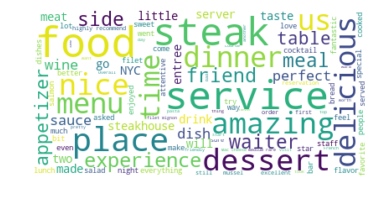

In [118]:
drawwc(e_word_cloud)

In [167]:
b_word_cloud, b_words = getpara(b_idx)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [168]:
PhrasesDetection(b_words,mincount=3)
    
dictionary=MakeDict(b_words)
    
corpus = [dictionary.doc2bow(word) for word in b_words]
    
tfidfcorpus = models.TfidfModel(corpus)
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
    
%time model=TrainModel(corpus,id2word=dictionary.id2token,num_topics = 4)
    
ShowTopics(model)
    
model.show_topics(num_topics=-1, num_words=20)

Number of unique tokens: 5295
Number of documents: 656
CPU times: user 13.1 s, sys: 277 ms, total: 13.4 s
Wall time: 12.4 s
'Average topic coherence: -2.6313.'
[([(0.0026925916, 'good'),
   (0.0025303261, 'restaurant'),
   (0.002423195, 'week'),
   (0.0022524006, 'great'),
   (0.0022441347, 'amazing'),
   (0.0021829563, 'nice'),
   (0.002132382, 'place'),
   (0.0020342274, 'would'),
   (0.002010039, 'service'),
   (0.00200366, 'really'),
   (0.0019565595, 'menu'),
   (0.0019314446, 'food'),
   (0.001867073, 'back'),
   (0.001850213, 'got'),
   (0.0018405786, 'steak'),
   (0.0018396558, 'chicken'),
   (0.0018293654, 'also'),
   (0.0018025961, 'definitely'),
   (0.0017994005, 'recommend'),
   (0.0017740007, 'came')],
  -1.3539479432400783),
 ([(0.0023621158, 'great'),
   (0.0018088147, 'place'),
   (0.0016403355, 'restaurant'),
   (0.0016272458, 'food'),
   (0.0016247806, 'dish'),
   (0.0015776061, 'service'),
   (0.001556831, 'delicious'),
   (0.0015380307, 'fresh'),
   (0.0015339191, '

[(0,
  '0.003*"good" + 0.003*"restaurant" + 0.002*"week" + 0.002*"great" + 0.002*"amazing" + 0.002*"nice" + 0.002*"place" + 0.002*"would" + 0.002*"service" + 0.002*"really" + 0.002*"menu" + 0.002*"food" + 0.002*"back" + 0.002*"got" + 0.002*"steak" + 0.002*"chicken" + 0.002*"also" + 0.002*"definitely" + 0.002*"recommend" + 0.002*"came"'),
 (1,
  '0.002*"great" + 0.002*"place" + 0.002*"restaurant" + 0.002*"food" + 0.002*"dish" + 0.002*"service" + 0.002*"delicious" + 0.002*"fresh" + 0.002*"best" + 0.002*"amazing" + 0.001*"good" + 0.001*"everything" + 0.001*"experience" + 0.001*"drink" + 0.001*"pasta" + 0.001*"time" + 0.001*"nyc" + 0.001*"star" + 0.001*"atmosphere" + 0.001*"staff"'),
 (2,
  '0.001*"a1" + 0.001*"trash" + 0.001*"kofta" + 0.001*"malai" + 0.001*"kim" + 0.001*"diver" + 0.001*"hat" + 0.001*"policy" + 0.000*"amaaazing" + 0.000*"dieeeee" + 0.000*"chaotic" + 0.000*"dreaming" + 0.000*"abouti" + 0.000*"almond" + 0.000*"calling" + 0.000*"overseeing" + 0.000*"restaurant s" + 0.000*"hyp

In [169]:
Visualization(model, corpus, dictionary)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.050246  0.010476       1        1  80.339882
1      0.013835 -0.020285       2        1  16.824800
3     -0.024842  0.009667       3        1   2.194951
2     -0.039239  0.000142       4        1   0.640361, topic_info=     Category       Freq          Term      Total  loglift  logprob
40    Default  44.000000          love  44.000000  30.0000  30.0000
56    Default  79.000000         place  79.000000  29.0000  29.0000
163   Default  64.000000          time  64.000000  28.0000  28.0000
98    Default  86.000000         great  86.000000  27.0000  27.0000
159   Default  49.000000         staff  49.000000  26.0000  26.0000
95    Default  71.000000          food  71.000000  25.0000  25.0000
458   Default  43.000000    absolutely  43.000000  24.0000  24.0000
138   Default  63.000000     delicious  63.000000  23.0000  23.0000
20    Default  38.000000         drink  38.000000  22.0000  22.0000
26    Default  40.000000      friendly  40.000000  21.0000  21.0000
97    Default  94.000000          good  94.000000  20.0000  20.0000
785   Default  23.000000        family  23.000000  19.0000  19.0000
451   Default  44.000000    everything  44.000000  18.0000  18.0000
369   Default  41.000000     excellent  41.000000  17.0000  17.0000
440   Default  46.000000        server  46.000000  16.0000  16.0000
62    Default  90.000000    restaurant  90.000000  15.0000  15.0000
68    Default  73.000000       service  73.000000  14.0000  14.0000
793   Default  37.000000     attentive  37.000000  13.0000  13.0000
46    Default  36.000000           nyc  36.000000  12.0000  12.0000
61    Default  62.000000     recommend  62.000000  11.0000  11.0000
586   Default  54.000000          best  54.000000  10.0000  10.0000
183   Default  40.000000    atmosphere  40.000000   9.0000   9.0000
505   Default  36.000000         fresh  36.000000   8.0000   8.0000
172   Default  24.000000         decor  24.000000   7.0000   7.0000
195   Default  51.000000          dish  51.000000   6.0000   6.0000
460   Default  23.000000     breakfast  23.000000   5.0000   5.0000
206   Default  60.000000          like  60.000000   4.0000   4.0000
82    Default  70.000000         would  70.000000   3.0000   3.0000
142   Default  34.000000        always  34.000000   2.0000   2.0000
433   Default  54.000000        friend  54.000000   1.0000   1.0000
...       ...        ...           ...        ...      ...      ...
1770   Topic4   0.120231       chaotic   3.167673   1.7796  -7.6343
1771   Topic4   0.120231      dreaming   3.167686   1.7796  -7.6343
1769   Topic4   0.120230        abouti   3.167699   1.7795  -7.6343
3993   Topic4   0.110751       calling   3.069367   1.7290  -7.7164
2920   Topic4   0.109595    overseeing   3.216170   1.6717  -7.7269
2922   Topic4   0.109595  restaurant s   3.216170   1.6717  -7.7269
3030   Topic4   0.099173    speechless   3.185806   1.5813  -7.8269
3027   Topic4   0.099172    gorgeously   3.185812   1.5813  -7.8269
3029   Topic4   0.099172        norway   3.185811   1.5813  -7.8269
3482   Topic4   0.092993      nautical   3.047807   1.5612  -7.8912
3476   Topic4   0.092993            62   3.047809   1.5612  -7.8912
3481   Topic4   0.092993         nauti   3.047809   1.5612  -7.8912
3479   Topic4   0.092993        hangar   3.047811   1.5612  -7.8912
3478   Topic4   0.092993           gin   3.047811   1.5612  -7.8912
3480   Topic4   0.092993        mule s   3.047812   1.5612  -7.8912
3985   Topic4   0.099506      kingside   3.326551   1.5414  -7.8235
1777   Topic4   0.092034           bin   3.077785   1.5411  -7.9016
1784   Topic4   0.092034          wash   3.077787   1.5411  -7.9016
1779   Topic4   0.092034      emptying   3.077787   1.5411  -7.9016
1783   Topic4   0.092034       wafting   3.077788   1.5411  -7.9016
3028   Topic4   0.098353       magical   3.386276   1.5120  -7.8352
3764   Topic4   0.115342     

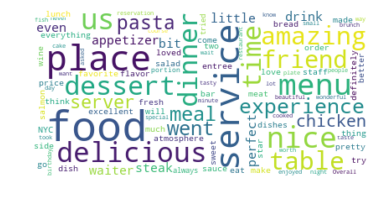

In [120]:
drawwc(b_word_cloud)

In [170]:
wr_word_cloud, wr_words = getpara(wr_idx)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


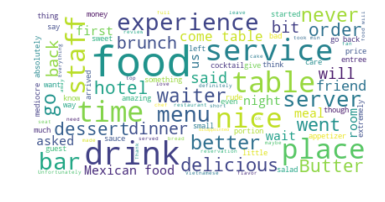

In [125]:
drawwc(wr_word_cloud)

In [171]:
w_word_cloud, w_words = getpara(w_idx)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [172]:
PhrasesDetection(w_words,mincount=3)
    
dictionary=MakeDict(w_words)
    
corpus = [dictionary.doc2bow(word) for word in w_words]
    
tfidfcorpus = models.TfidfModel(corpus)
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
    
%time model=TrainModel(corpus,id2word=dictionary.id2token,num_topics = 4)
    
ShowTopics(model)
    
model.show_topics(num_topics=-1, num_words=20)

Number of unique tokens: 5607
Number of documents: 660
CPU times: user 14 s, sys: 284 ms, total: 14.3 s
Wall time: 14.6 s
'Average topic coherence: -0.7440.'
[([(0.0016883601, 'guac'),
   (0.0014981502, 'friend'),
   (0.001332254, 'good'),
   (0.0013267453, 'restaurant'),
   (0.0013056848, 'drink'),
   (0.0013045515, 'table'),
   (0.0012945731, 'minute'),
   (0.0012729433, 'menu'),
   (0.0012470612, 'get'),
   (0.001230038, 'u'),
   (0.0012269313, 'hour'),
   (0.0012265122, 'really'),
   (0.0012256977, 'time'),
   (0.0011980952, 'go'),
   (0.001175823, 'made'),
   (0.0011484855, 'definitely'),
   (0.0011480008, 'came'),
   (0.0011410884, 'reservation'),
   (0.0011260877, 'didn t'),
   (0.0011256695, 'place')],
  -1.4048043530412078),
 ([(0.0015589265, 'place'),
   (0.0015335609, 'dish'),
   (0.0013655752, 'good'),
   (0.0013451478, 'delicious'),
   (0.0013283627, 'service'),
   (0.0013278059, 'food'),
   (0.0013093093, 'server'),
   (0.0013051328, 'table'),
   (0.0012784256, 'excellent

[(0,
  '0.002*"place" + 0.002*"dish" + 0.001*"good" + 0.001*"delicious" + 0.001*"service" + 0.001*"food" + 0.001*"server" + 0.001*"table" + 0.001*"excellent" + 0.001*"brunch" + 0.001*"restaurant" + 0.001*"came" + 0.001*"u" + 0.001*"really" + 0.001*"amazing" + 0.001*"back" + 0.001*"would" + 0.001*"waiter" + 0.001*"nice" + 0.001*"didn t"'),
 (1,
  '0.002*"sushi" + 0.002*"restaurant" + 0.002*"week" + 0.002*"steak" + 0.001*"ordered" + 0.001*"food" + 0.001*"good" + 0.001*"place" + 0.001*"like" + 0.001*"portion" + 0.001*"fun" + 0.001*"drink" + 0.001*"taco" + 0.001*"order" + 0.001*"nice" + 0.001*"service" + 0.001*"got" + 0.001*"mexican" + 0.001*"margarita" + 0.001*"people"'),
 (2,
  '0.002*"great" + 0.002*"drink" + 0.002*"dinner" + 0.002*"time" + 0.002*"good" + 0.002*"enjoyed" + 0.001*"really" + 0.001*"server" + 0.001*"u" + 0.001*"place" + 0.001*"definitely" + 0.001*"restaurant" + 0.001*"loved" + 0.001*"go" + 0.001*"friend" + 0.001*"delicious" + 0.001*"steak" + 0.001*"back" + 0.001*"well" + 0

In [173]:
Visualization(model, corpus, dictionary)

/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.024284 -0.002972       1        1  27.896954
0     -0.005691 -0.010210       2        1  26.773531
3     -0.004970  0.022378       3        1  26.711279
2     -0.013623 -0.009197       4        1  18.618237, topic_info=     Category       Freq         Term      Total  loglift  logprob
3177  Default  25.000000         guac  25.000000  30.0000  30.0000
480   Default  25.000000      enjoyed  25.000000  29.0000  29.0000
3010  Default  20.000000    margarita  20.000000  28.0000  28.0000
2988  Default  11.000000       dakota  11.000000  27.0000  27.0000
3011  Default  21.000000      mexican  21.000000  26.0000  26.0000
1502  Default  26.000000          fun  26.000000  25.0000  25.0000
1985  Default  28.000000         taco  28.000000  24.0000  24.0000
98    Default  59.000000        great  59.000000  23.0000  23.0000
573   Default  24.000000        loved  24.000000  22.0000  22.0000
2084  Default  14.000000       classy  14.000000  21.0000  21.0000
432   Default  18.000000         cool  18.000000  20.0000  20.0000
2981  Default   9.000000        swing   9.000000  19.0000  19.0000
14    Default  43.000000       dinner  43.000000  18.0000  18.0000
2983  Default   9.000000     carnitas   9.000000  17.0000  17.0000
2984  Default   9.000000  margarita s   9.000000  16.0000  16.0000
2982  Default   9.000000     cadillac   9.000000  15.0000  15.0000
1632  Default  36.000000        sushi  36.000000  14.0000  14.0000
306   Default  22.000000         vibe  22.000000  13.0000  13.0000
3212  Default  15.000000         lime  15.000000  12.0000  12.0000
522   Default  20.000000            7  20.000000  11.0000  11.0000
2987  Default  15.000000       casual  15.000000  10.0000  10.0000
983   Default  19.000000     received  19.000000   9.0000   9.0000
401   Default  43.000000       server  43.000000   8.0000   8.0000
438   Default  22.000000         feel  22.000000   7.0000   7.0000
767   Default  32.000000       brunch  32.000000   6.0000   6.0000
3270  Default  17.000000     sandwich  17.000000   5.0000   5.0000
2151  Default  17.000000      someone  17.000000   4.0000   4.0000
96    Default  56.000000        drink  56.000000   3.0000   3.0000
1804  Default  22.000000    guacamole  22.000000   2.0000   2.0000
2985  Default  11.000000         pear  11.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
35     Topic4   7.648841         last  20.125021   0.7136  -6.9854
692    Topic4   7.515129       shared  20.218353   0.6914  -7.0030
271    Topic4   6.518075        clean  16.760307   0.7366  -7.1454
96     Topic4  14.938251        drink  56.041618   0.3589  -6.3160
686    Topic4   8.136428       you re  23.558960   0.6179  -6.9236
71     Topic4  13.582006         time  51.505791   0.3481  -6.4112
401    Topic4  11.490244       server  43.528816   0.3491  -6.5785
325    Topic4   8.731363        first  28.618612   0.4939  -6.8530
159    Topic4  12.392803       really  57.070637   0.1539  -6.5028
29     Topic4  12.998982         good  62.582790   0.1094  -6.4551
419    Topic4   9.651041         well  37.582260   0.3216  -6.7529
849    Topic4  10.887168   definitely  48.957779   0.1777  -6.6324
74     Topic4  11.192253            u  52.058517   0.1439  -6.6047
77     Topic4   8.579216       wasn t  30.762148   0.4041  -6.8706
324    Topic4   7.918420    fantastic  25.926392   0.4950  -6.9508
698    Topic4  10.021588       friend  44.334789   0.1940  -6.7152
352    Topic4   9.582011      amazing  41.057945   0.2259  -6.7601
147    Topic4  10.080128           go  47.728764   0.1261  -6.7094
205    Topic4  10.973344        place  60.327415  -0.0233  -6.6245
320    Topic4   9.852225    delicious  46.186935   0.1360  -6.7323
51     Topic4  10.628927   restaurant  61.632126  -0.0766  -6.6564
316    Topic4   9.769574         back  47.038765   0.1093  -6.7407
583    Topic4  